Question 1: 
Compute the sparsity of the movie rating dataset, where sparsity is defined by equation:
Sparsity = Total number of available ratings/Total number of possible ratings

In [12]:
import numpy as np
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('ml-latest-small/ratings.csv')
movie = pd.read_csv('ml-latest-small/movies.csv')
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)})

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

#Question 1
num_movies = len(set(ratings['movieId']))
num_users = len(set(ratings['userId']))
sparsity = len(ratings) / (num_movies * num_users)

print('Sparsity: ', sparsity)

Sparsity:  0.016999683055613623


Question 2: Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

In [13]:
#Building R matrix
# extract key information
users = ratings['userId'].values
movies = ratings['movieId'].values
ratings_val = ratings['rating'].values
movie_set = set(movies)
user_set = set(users)

movieId_map_col = {} # key is the movieId, value is column index
def create_R(users, movies, ratings_val):
    user_num = len(user_set)
    movie_num = len(movie_set)

    for i in range(movie_num):
        movieId_map_col[list(movie_set)[i]] = i
        
    matrix_R = np.zeros((user_num, movie_num),dtype = float)
    for i in range(len(users)):
        matrix_R[users[i]-1][movieId_map_col[movies[i]]] = ratings_val[i]
    return matrix_R

matrix_R = create_R(users, movies, ratings_val)
print(matrix_R.shape)

(610, 9724)


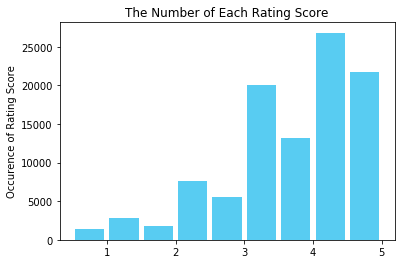

In [43]:
import matplotlib.pyplot as plt

plt.hist(ratings_val, bins = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], color = '#58CCF2', rwidth = 0.85)
plt.title("The Number of Each Rating Score")
plt.ylabel("Occurence of Rating Score")

plt.show()

Question 3: Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y -axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has
index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.

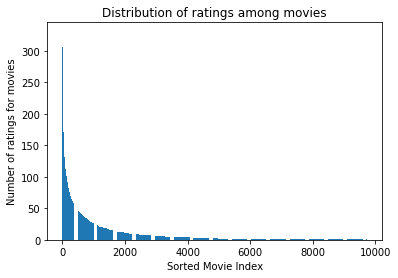

In [18]:
from collections import Counter

movie_count = Counter(ratings['movieId'])
plt.bar(np.arange(len(set(ratings['movieId']))),sorted(movie_count.values(),reverse = True))
plt.title('Distribution of ratings among movies')
plt.ylabel('Number of ratings for each movie')
plt.xlabel('Sorted Movie Index')
plt.show()

Question 4: Plot the distribution of ratings among users. To be specificc, the X-axis should be the user index ordered by decreasing frequency and the Y -axis should be the number of movies the user have rated. The requirement of the plot is similar to that in Question 3.

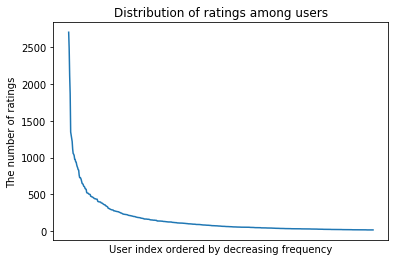

Text(0.5, 0, 'Users')

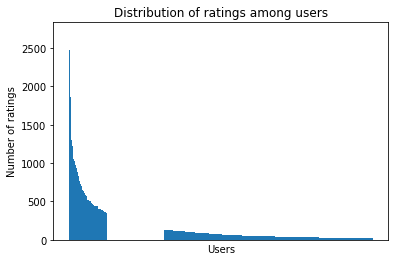

In [31]:
# Count the frequencies of users
all_users = [data[0] for data in data.raw_ratings]
user_ids, user_counts = np.unique(all_users, return_counts=True)

# Sort the users according to the number of ratings
user_ids_counts = np.concatenate((user_ids.reshape(-1, 1), user_counts.reshape(-1, 1)), axis=1).astype(np.int32)
user_ids_counts = user_ids_counts[user_ids_counts[:, 1].argsort()]  # Sort according to the counts
user_ids_counts = np.flip(user_ids_counts, axis=0)  # Change to descending order

# Plot the distribution
plt.figure()
plt.title("Distribution of ratings among users")
plt.plot(user_ids_counts[:, 1])
plt.xticks([])  # Hide the x labels
plt.xlabel('User index ordered by decreasing frequency')
plt.ylabel('The number of ratings')
plt.show()


c2 = Counter(ratings['userId'])
plt.bar(np.arange(num_users),sorted(c2.values(),reverse = True))
plt.xticks([], [])
plt.title('Distribution of ratings among users')
plt.ylabel('Number of ratings')
plt.xlabel('Users')

Question 6: Compute the variance of the rating values received by each movie.
Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

max variance of the rating score: 5.062500
min variance of the rating score: 0.000000
10.125


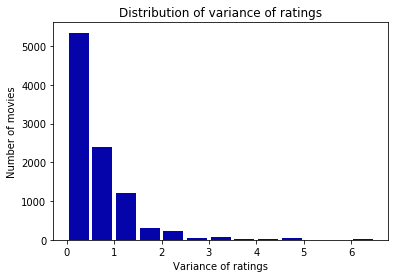

In [47]:
var_matrix = []  # save the variance of each movies

for i in range(matrix_R.shape[1]):
    valid = np.nonzero(matrix_R[:,i])
    var_matrix.append(np.var(matrix_R[valid,i]))


print("max variance of the rating score: %f" % max(var_matrix))
print("min variance of the rating score: %f" % min(var_matrix))

var = ratings.groupby('movieId')['rating'].var().fillna(0).tolist()
print(max(var))
plt.hist(var, bins = np.arange(0,7,0.5), color='#0504aa', rwidth=0.85)
plt.xlabel('Variance of ratings')
plt.ylabel('Number of movies')
plt.title('Distribution of variance of ratings')
plt.show()

# SECTION 4

Question 10: Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [ ]:
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate

k_range = range(2,100,2)
avg_rmse, avg_mae = [], []
for k in k_range:
    algo = KNNWithMeans(k=k, sim_options = {'name':'pearson','user_based': True}) 
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    avg_rmse.append(np.mean(cv_results['test_rmse']))
    avg_mae.append(np.mean(cv_results['test_mae']))
  
plt.plot(k_range, avg_rmse, label = "Average RMSE")
plt.plot(k_range, avg_mae, label = "Average MAE")
plt.xlabel('Number of neighbors')
plt.ylabel('Error')
plt.legend()
plt.show()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.